In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
      return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

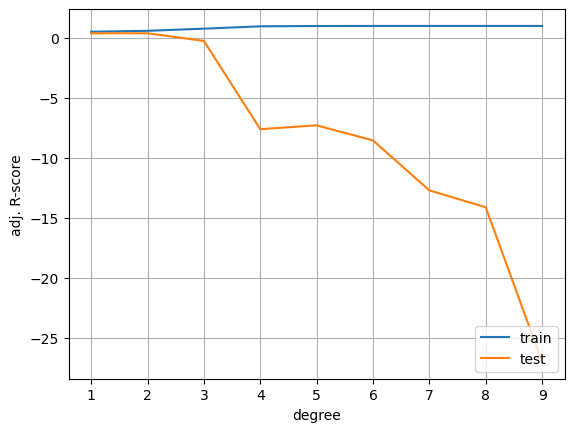

In [16]:
# Same as last lecture
max_degree = 10 # max polynomial degree
train_scores = []
test_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 10)), train_scores, label="train")
plt.plot(list(range(1, 10)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()
